In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
# Copied from https://gist.github.com/grzanka/0485c05a59991c4826d2c2624710e5f0
def read_trc_file(filename, count=-1, only_metadata = False):
    from lecroy import LecroyBinaryWaveform
    data = LecroyBinaryWaveform(inputfilename=filename, file_content=None, count=count)
    y_data = None
    if not only_metadata:
        y_data = data.WAVE_ARRAY_RAW
    metadata_dict = data.metadata
    return y_data, metadata_dict


In [57]:
# Copied from: https://gist.github.com/grzanka/0485c05a59991c4826d2c2624710e5f0
def convert_to_uV(y_data, metadata_dict):
    # if metadata_dict['VERTICAL_GAIN'] != np.float32('6.25e-5'):
    #     return None

    offset_uV = np.int32(np.around(metadata_dict['VERTICAL_OFFSET'] * 1e6))

    y_data_uV = y_data.astype(np.int32)
    y_data_uV //= 16
    y_data_uV *= 100
    y_data_uV -= offset_uV

    return y_data_uV

In [58]:
file = 'data.trc'
trc_data = read_trc_file(file)
trc_data_converted = convert_to_uV(trc_data[0], trc_data[1])

In [59]:
trc_data_converted

array([ 1900,  1900,  2600, ..., -4700, -4100, -3700], dtype=int32)

In [60]:
#short_data = trc_data_converted[:10000]

In [61]:
plt.hist(trc_data_converted, bins=100)

(array([  6.69000000e+02,   1.70000000e+01,   2.50000000e+01,
          2.60000000e+01,   2.00000000e+01,   1.30000000e+01,
          1.20000000e+01,   2.10000000e+01,   2.00000000e+01,
          2.50000000e+01,   1.90000000e+01,   2.20000000e+01,
          1.90000000e+01,   2.10000000e+01,   1.60000000e+01,
          2.10000000e+01,   1.90000000e+01,   1.90000000e+01,
          2.10000000e+01,   1.10000000e+01,   3.10000000e+01,
          2.80000000e+01,   3.60000000e+01,   2.90000000e+01,
          4.30000000e+01,   4.50000000e+01,   3.90000000e+01,
          3.70000000e+01,   3.40000000e+01,   4.80000000e+01,
          5.00000000e+01,   4.70000000e+01,   4.90000000e+01,
          5.40000000e+01,   5.70000000e+01,   7.70000000e+01,
          5.60000000e+01,   6.90000000e+01,   6.90000000e+01,
          8.50000000e+01,   8.30000000e+01,   9.90000000e+01,
          8.50000000e+01,   9.50000000e+01,   1.16000000e+02,
          1.10000000e+02,   1.23000000e+02,   1.27000000e+02,
        

In [62]:
plt.yscale('log', nonposy='clip')

In [63]:
plt.ylabel('Points')
plt.xlabel('Value')

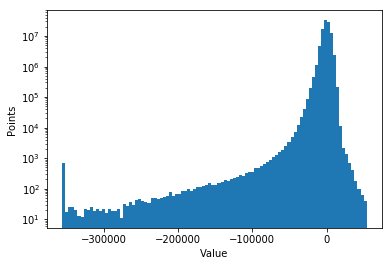

In [64]:
plt.show()